In [2]:
# Import the important library for data preprocessing, Input-Output of dataset and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## 2. Loading data in Pandas Dataframe :

In [3]:
df = pd.read_csv('C:/Users/kavya/OneDrive/Desktop/Oasisinfo/DataScience/Iris/Iris.csv').drop("Id", axis=1)
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no Null values

<AxesSubplot:xlabel='SepalLengthCm'>

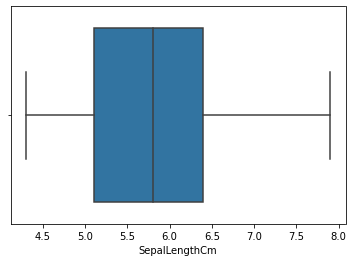

In [7]:
sns.boxplot(df.SepalLengthCm)


<AxesSubplot:xlabel='SepalWidthCm'>

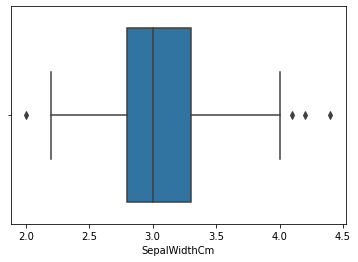

In [8]:
sns.boxplot(df.SepalWidthCm)


<AxesSubplot:>

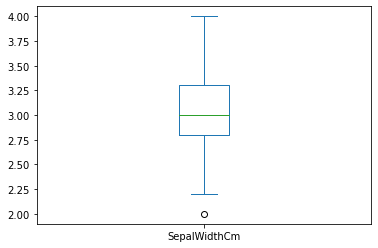

In [9]:
# Treat

df = df[df.SepalWidthCm <= 4]

df['SepalWidthCm'].plot(kind='box')

<AxesSubplot:xlabel='PetalLengthCm'>

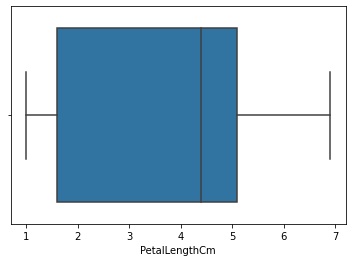

In [10]:
sns.boxplot(df.PetalLengthCm)


<AxesSubplot:xlabel='PetalWidthCm'>

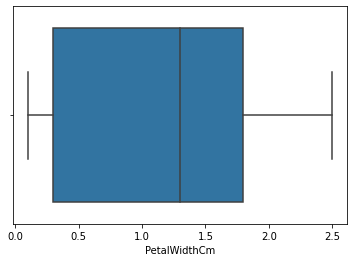

In [11]:
sns.boxplot(df.PetalWidthCm)


There are no outliers

## 3. Plotting Graph :

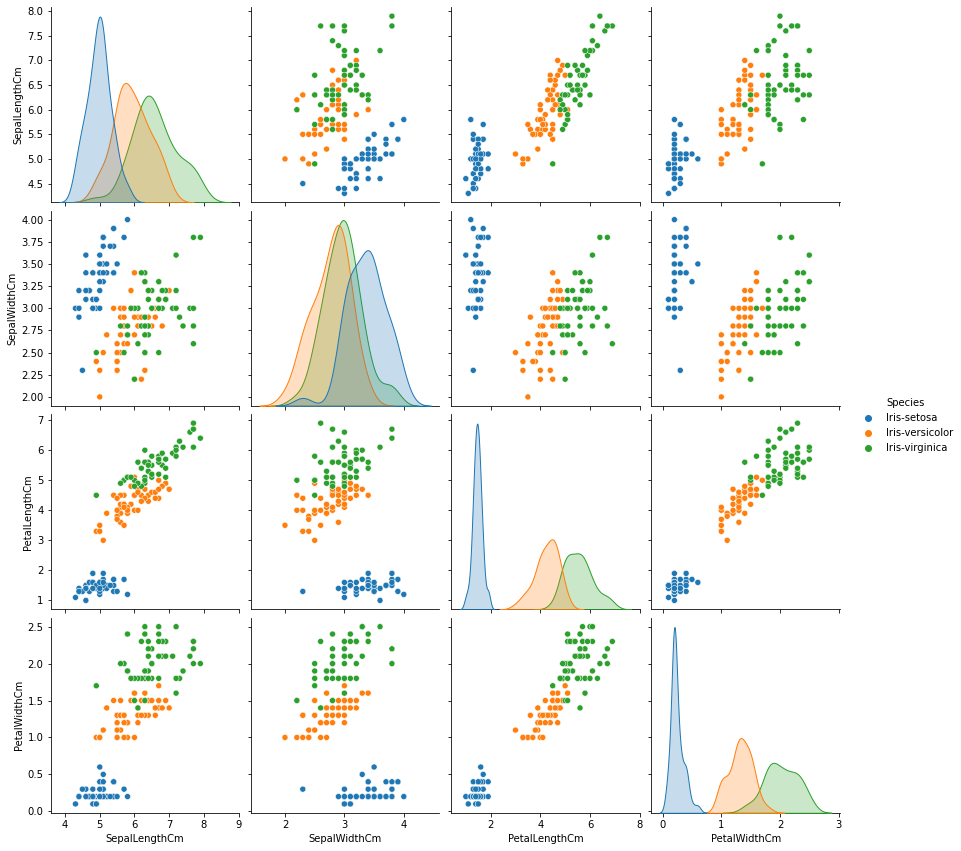

In [12]:
sns.pairplot(df, hue="Species", size=3, diag_kind="kde");

## 4. Feature Extraction and Test-Train-Split : 

In [13]:
df = df.replace(['Iris-versicolor','Iris-virginica','Iris-setosa'],[0, 1, 2])
X = df.drop("Species",axis=1)
y  = df["Species"]

In [14]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 5. Importing Models (Algorithms) :

In [15]:
# Import the models from sklearn
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

objects = ('DTs', 'KNN', 'RF')

In [16]:
# Initialize the three models
A = DecisionTreeClassifier(random_state=42)
B = KNeighborsClassifier(n_neighbors=3)
C = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

## 6. Train and Test Models (Algorithms) :

In [17]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [23]:
# loop to call function for each model
clf = [A,B,C]
pred_val = [0,0,0]

for a in range(0,3):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='macro') 
    print (pred_val[a])

0.9776576576576578
0.9546783625730995
0.9776576576576578


## 7. Ploating Graph for better Visualization :

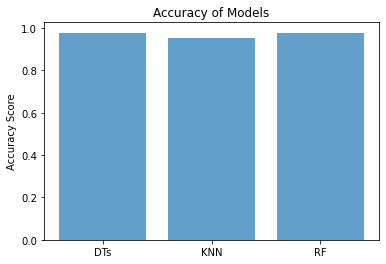

In [24]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

## 8. Conclusion :

Best result is achived using Decision Trees classifier and Random Forest classifier.